In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training  = pd.read_csv('training.csv')

In [3]:
training.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [4]:
training.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,7094.0,4742.627291,2731.120086,1.000000,2397.250000,4744.500000,7105.000000,9459.000000
Q1,7094.0,38.239498,16.332148,16.000000,25.000000,35.000000,48.000000,100.000000
Q2,7094.0,1.559910,0.496433,1.000000,1.000000,2.000000,2.000000,2.000000
Q3,7094.0,1.787426,1.165160,1.000000,1.000000,1.000000,3.000000,4.000000
Q4,7094.0,3.060051,1.557779,1.000000,2.000000,3.000000,3.000000,8.000000
Q5,7094.0,2.548915,1.534257,1.000000,1.000000,3.000000,4.000000,6.000000
Q6,7094.0,1.840569,0.366103,1.000000,2.000000,2.000000,2.000000,2.000000
Q7,7094.0,1.397942,0.489508,1.000000,1.000000,1.000000,2.000000,2.000000
Q8_1,7094.0,0.062165,0.241472,0.000000,0.000000,0.000000,0.000000,1.000000
Q8_2,7094.0,0.630110,0.482809,0.000000,0.000000,1.000000,1.000000,1.000000


In [5]:
training.isnull().sum()

ID                             0
Q1                             0
Q2                             0
Q3                             0
Q4                             0
Q5                             0
Q6                             0
Q7                             0
Q8_1                           0
Q8_2                           0
Q8_3                           0
Q8_4                           0
Q8_5                           0
Q8_6                           0
Q8_7                           0
Q8_8                           0
Q8_9                           0
Q8_10                          0
Q8_11                          0
Q9                             0
Q10                            0
Q11                            0
Q12                            0
Q13                            0
Q14                            0
Q15                            0
Q16                            0
Q17                            0
Q18                            0
Q19                            0
Latitude  

In [6]:
def ageBin(age):
    if(age<26):
        return '16-26'
    elif(age>=25 and age< 36):
        return '25-36'
    elif(age>=35 and age< 46):
        return '35-46'
    elif(age>=46 and age< 56):
        return '46-56'
    elif(age>=56 and age< 66):
        return '56-66'
    elif(age>=66 and age< 76):
        return '66-76'
    elif(age>=76 and age< 86):
        return '76-86'
    else:
        return '86<'

training['age_bin'] = training.Q1.apply(ageBin)

def gender(Q2):
    if(Q2==1):
        return 'Male'
    else:
        return 'Female'

training['Gender'] = training.Q2.apply(gender)

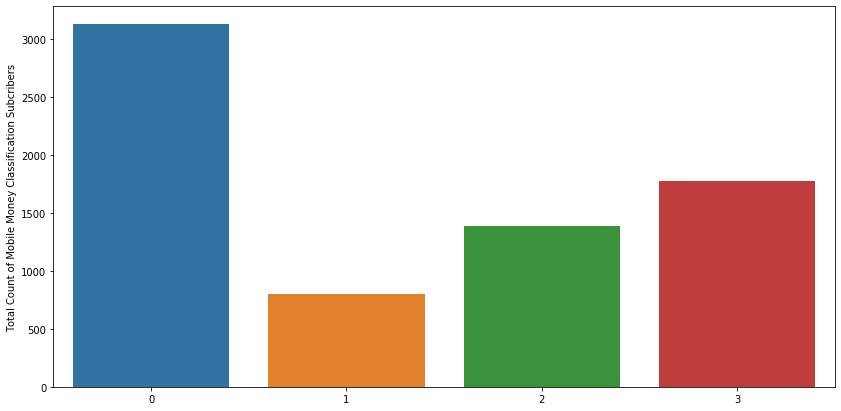

In [7]:
plt.figure(figsize=(14,7))
sns.barplot(training.mobile_money_classification.unique(),training.mobile_money_classification.value_counts(),data=training)
plt.ylabel('Total Count of Mobile Money Classification Subcribers')
plt.show()

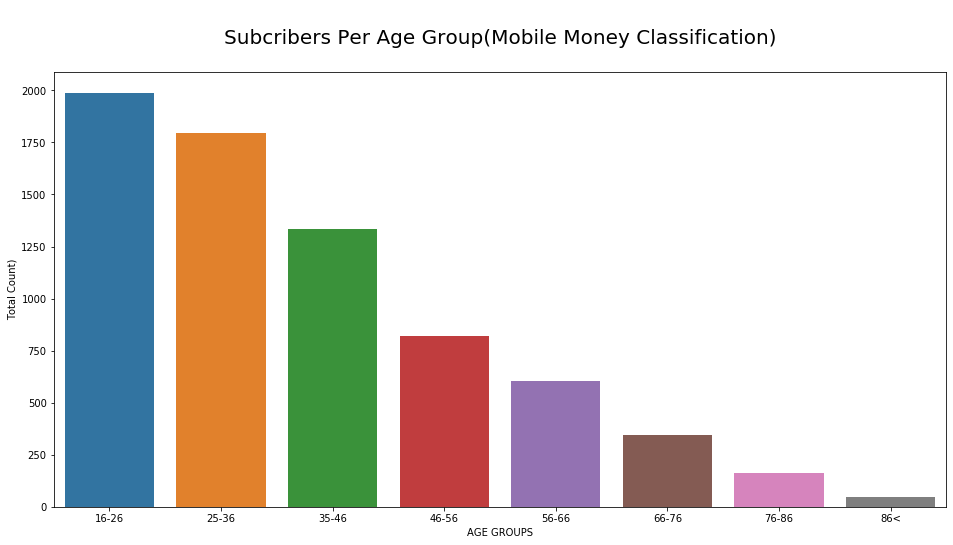

In [8]:
plt.subplots(figsize=(16, 8))
sns.barplot(training.age_bin.sort_values().unique(),training.groupby('age_bin').mobile_money_classification.count().sort_values(ascending=False),data=training)
plt.title('\nSubcribers Per Age Group(Mobile Money Classification)\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('AGE GROUPS')
plt.show()

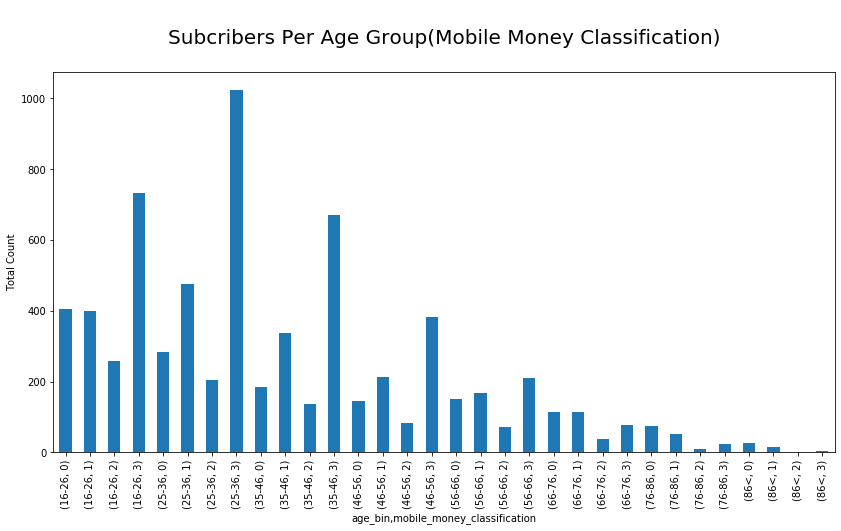

In [9]:
training.groupby(['age_bin','mobile_money_classification']).mobile_money_classification.count().plot(kind='bar',figsize=(14,7))
plt.title('\nSubcribers Per Age Group(Mobile Money Classification)\n',fontsize=20)
plt.ylabel('Total Count')
plt.show()

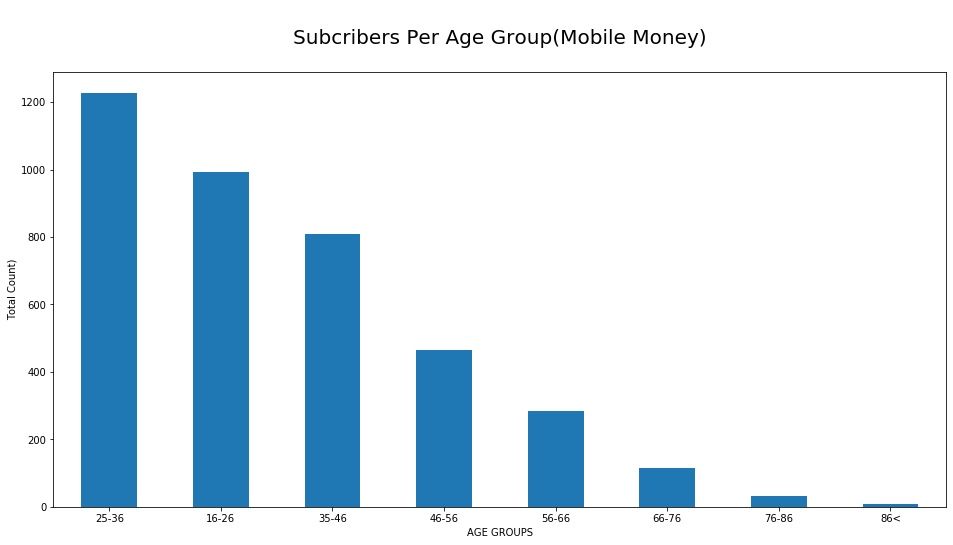

In [10]:
plt.subplots(figsize=(16, 8))
training[training.mobile_money==1].groupby('age_bin').mobile_money.count().sort_values(ascending=False).plot(kind='bar')
plt.title('\nSubcribers Per Age Group(Mobile Money)\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('AGE GROUPS')
plt.xticks(rotation=0)
plt.show()

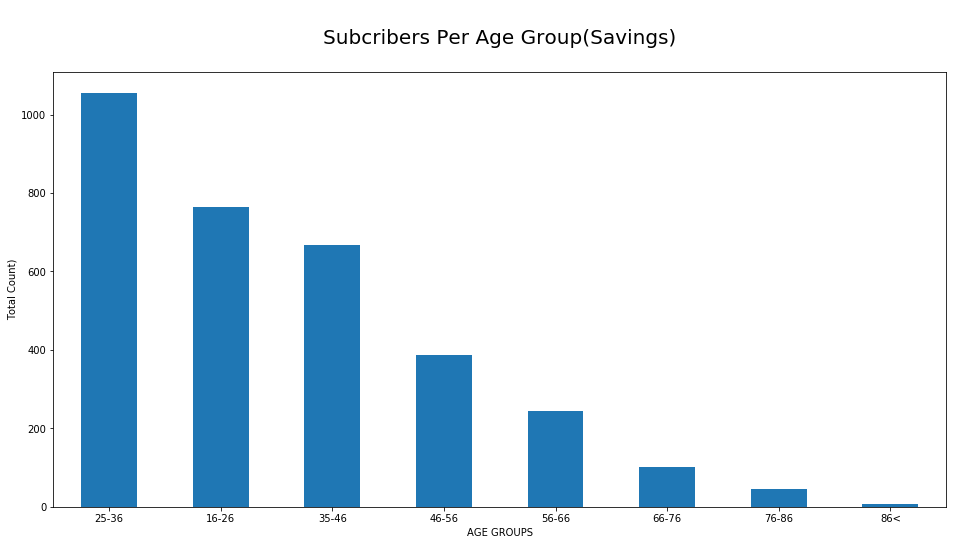

In [11]:
plt.subplots(figsize=(16, 8))
training[training.savings==1].groupby('age_bin').savings.count().sort_values(ascending=False).plot(kind='bar')
plt.title('\nSubcribers Per Age Group(Savings)\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('AGE GROUPS')
plt.xticks(rotation=0)
plt.show()

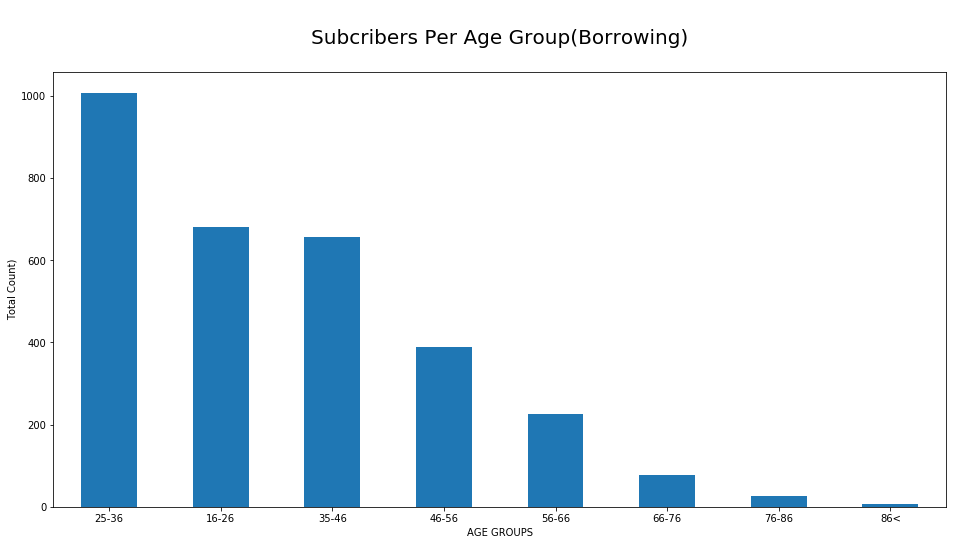

In [12]:
plt.subplots(figsize=(16, 8))
training[training.borrowing==1].groupby('age_bin').borrowing.count().sort_values(ascending=False).plot(kind='bar')
plt.title('\nSubcribers Per Age Group(Borrowing)\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('AGE GROUPS')
plt.xticks(rotation=0)
plt.show()

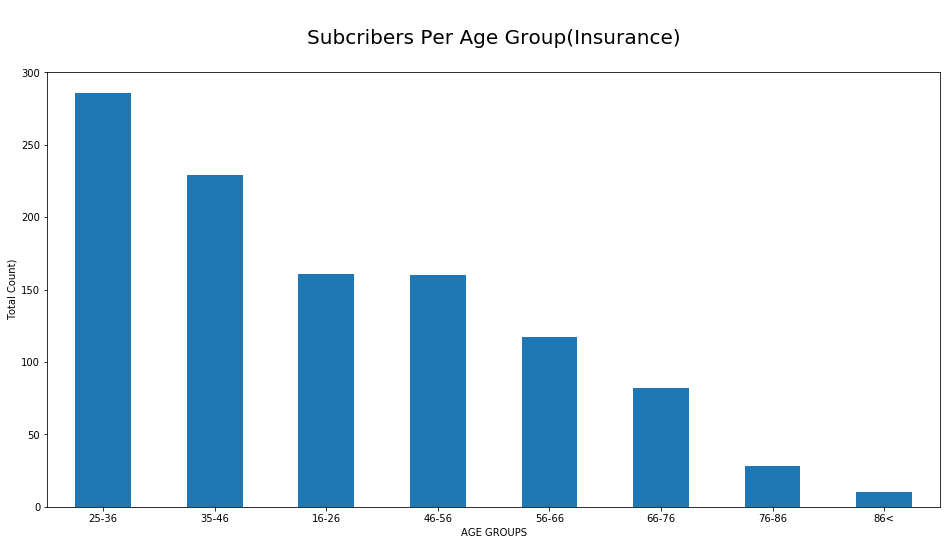

In [13]:
plt.subplots(figsize=(16, 8))
training[training.insurance==1].groupby('age_bin').insurance.count().sort_values(ascending=False).plot(kind='bar')
plt.title('\nSubcribers Per Age Group(Insurance)\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('AGE GROUPS')
plt.xticks(rotation=0)
plt.show()

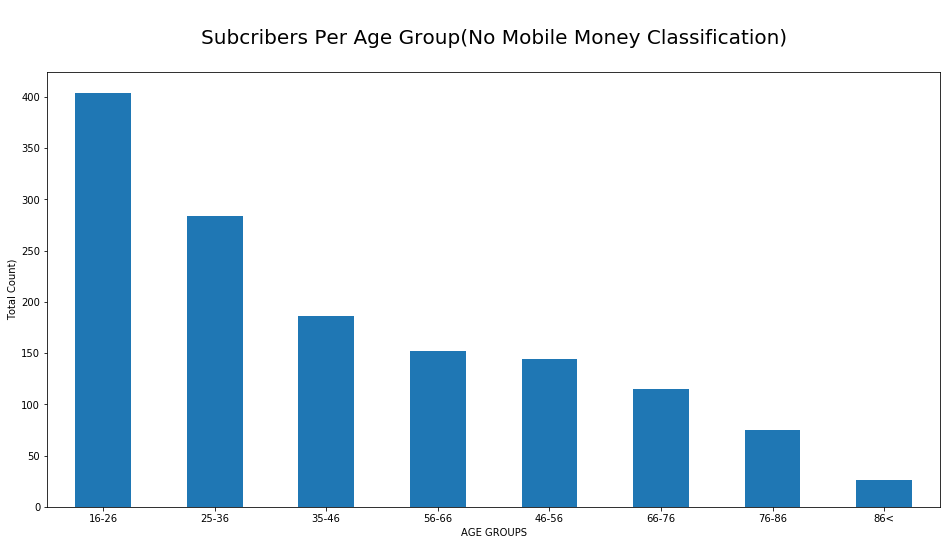

In [14]:

plt.subplots(figsize=(16, 8))
training[training.mobile_money_classification==0].groupby('age_bin').mobile_money_classification.count().sort_values(ascending=False).plot(kind='bar')
plt.title('\nSubcribers Per Age Group(No Mobile Money Classification)\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('AGE GROUPS')
plt.xticks(rotation=0)
plt.show()

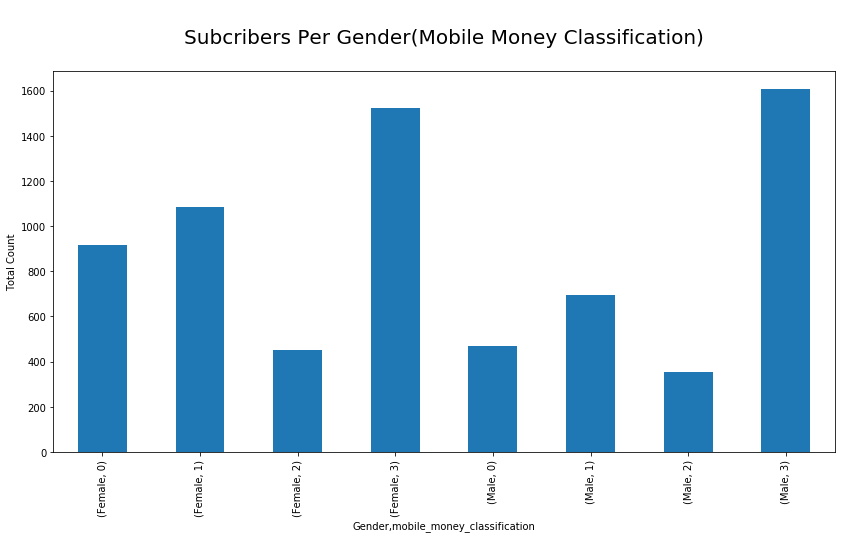

In [15]:
training.groupby(['Gender','mobile_money_classification']).mobile_money_classification.count().plot(kind='bar',figsize=(14,7))
plt.title('\nSubcribers Per Gender(Mobile Money Classification)\n',fontsize=20)
plt.ylabel('Total Count')
plt.show()

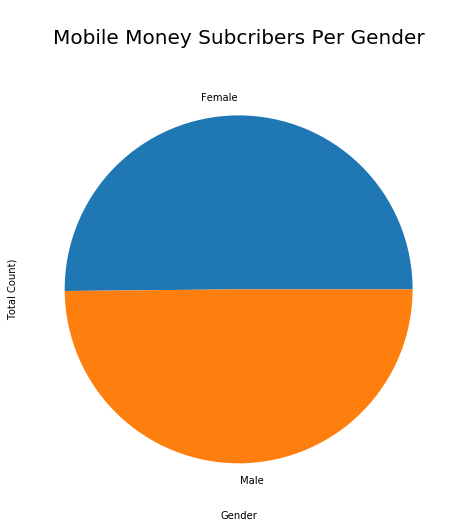

In [16]:
plt.subplots(figsize=(8, 8))
training[training.mobile_money==1].groupby('Gender').mobile_money.count().sort_values(ascending=False).plot(kind='pie')
plt.title('\nMobile Money Subcribers Per Gender\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

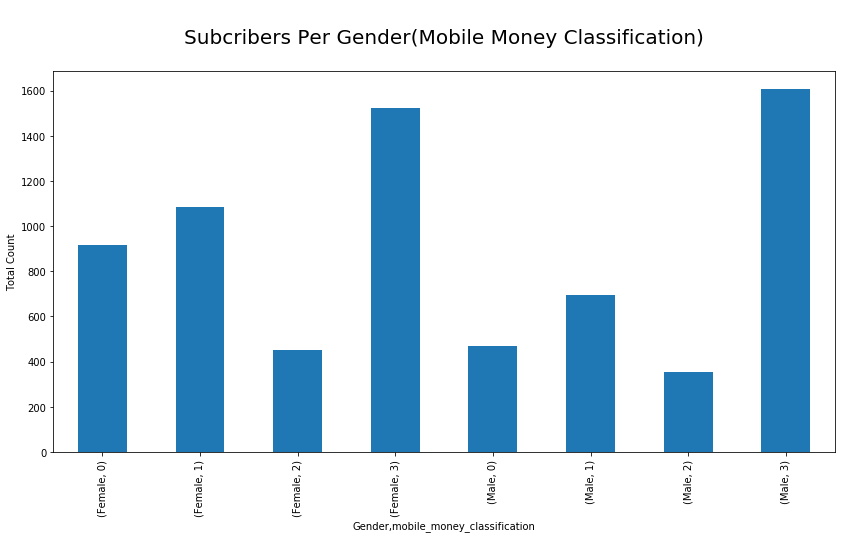

In [17]:
training.groupby(['Gender','mobile_money_classification']).mobile_money_classification.count().plot(kind='bar',figsize=(14,7))
plt.title('\nSubcribers Per Gender(Mobile Money Classification)\n',fontsize=20)
plt.ylabel('Total Count')
plt.show()

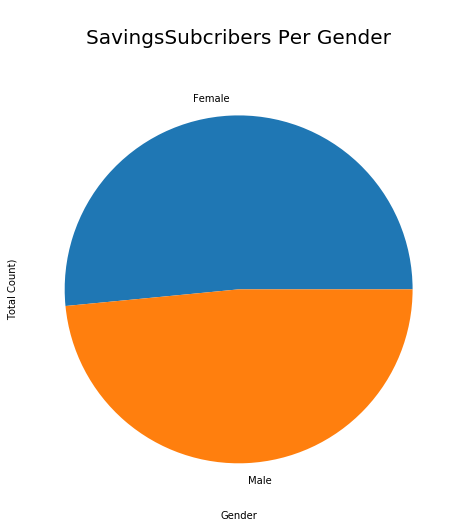

In [18]:

plt.subplots(figsize=(8, 8))
training[training.savings==1].groupby('Gender').savings.count().sort_values(ascending=False).plot(kind='pie')
plt.title('\nSavingsSubcribers Per Gender\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()





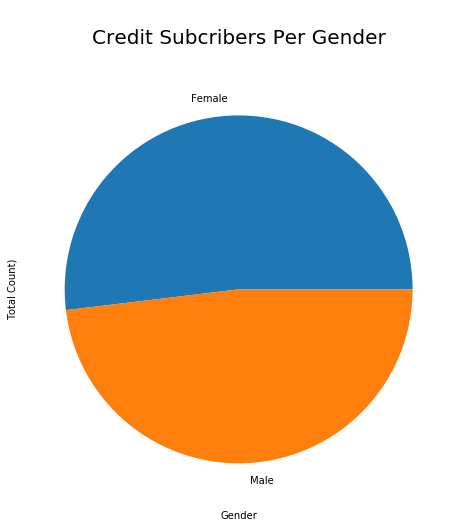

In [19]:

plt.subplots(figsize=(8, 8))
training[training.borrowing==1].groupby('Gender').borrowing.count().sort_values(ascending=False).plot(kind='pie')
plt.title('\nCredit Subcribers Per Gender\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()


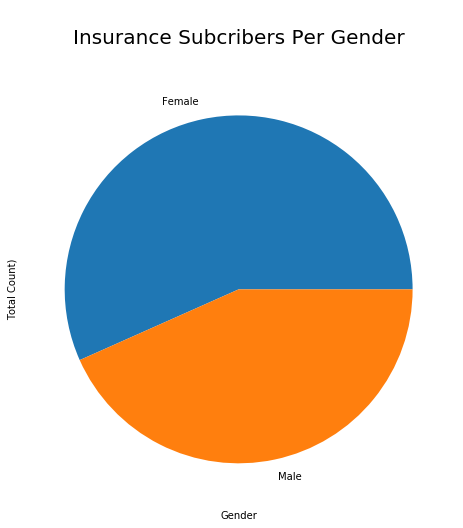

In [20]:
plt.subplots(figsize=(8, 8))
training[training.insurance==1].groupby('Gender').insurance.count().sort_values(ascending=False).plot(kind='pie')
plt.title('\nInsurance Subcribers Per Gender\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()



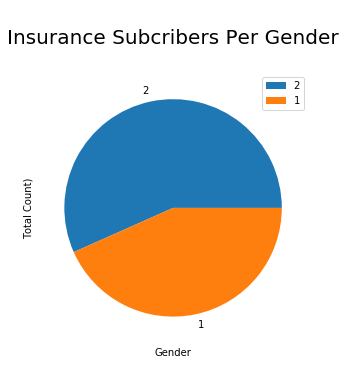

In [21]:
training[training.insurance==1].groupby('Q2').count().sort_values(by='insurance',ascending=False).plot.pie(y='insurance', figsize=(5, 5))
plt.title('\nInsurance Subcribers Per Gender\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()


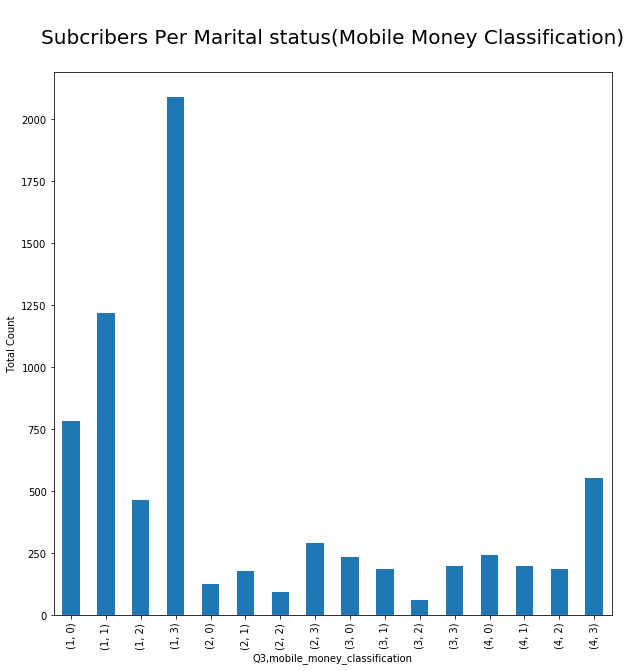

In [22]:
training.groupby(['Q3','mobile_money_classification']).mobile_money_classification.count().plot(kind='bar',figsize=(10,10))
plt.title('\nSubcribers Per Marital status(Mobile Money Classification)\n',fontsize=20)
plt.ylabel('Total Count')
plt.show()

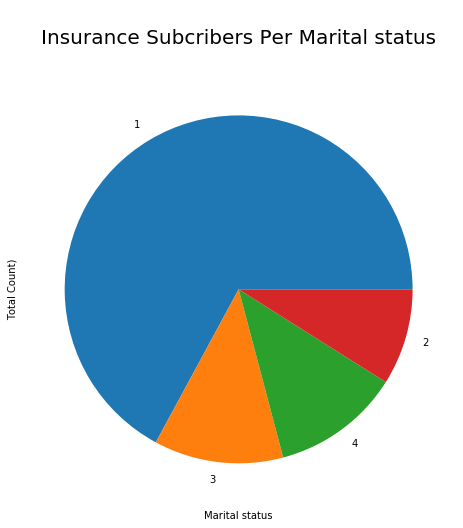

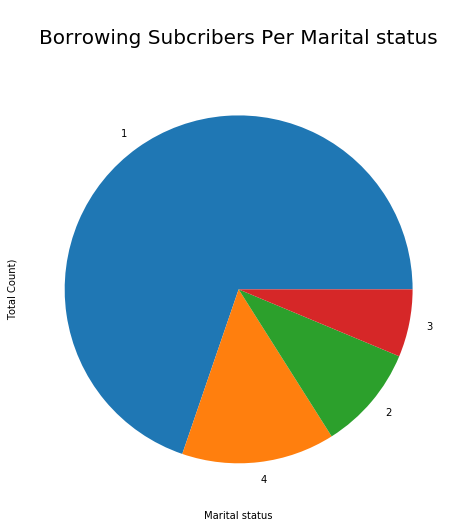

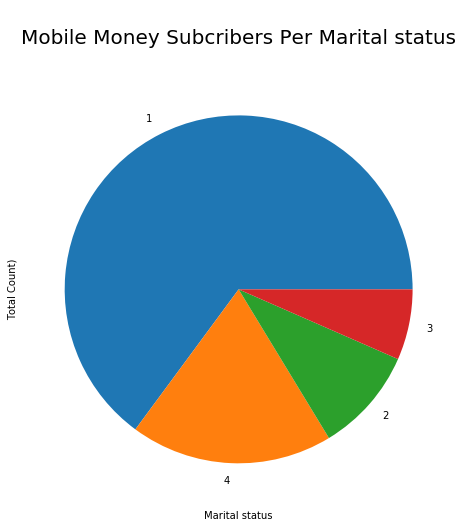

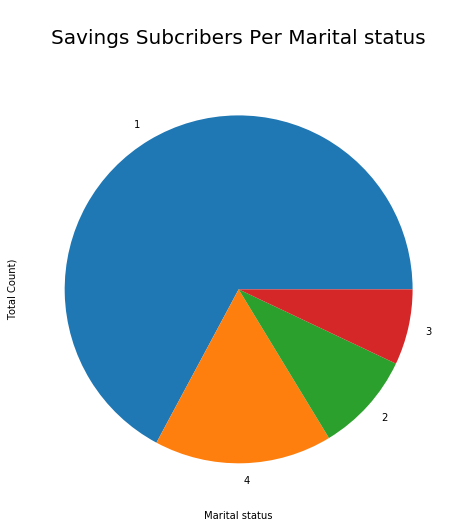

In [23]:
plt.subplots(figsize=(8, 8))
training[training.insurance==1].groupby('Q3').insurance.count().sort_values(ascending=False).plot(kind='pie')
plt.title('\nInsurance Subcribers Per Marital status\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('Marital status')
plt.xticks(rotation=0)
plt.show()

plt.subplots(figsize=(8, 8))
training[training.borrowing==1].groupby('Q3').borrowing.count().sort_values(ascending=False).plot(kind='pie')
plt.title('\nBorrowing Subcribers Per Marital status\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('Marital status')
plt.xticks(rotation=0)
plt.show()

plt.subplots(figsize=(8, 8))
training[training.mobile_money==1].groupby('Q3').mobile_money.count().sort_values(ascending=False).plot(kind='pie')
plt.title('\nMobile Money Subcribers Per Marital status\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('Marital status')
plt.xticks(rotation=0)
plt.show()

plt.subplots(figsize=(8, 8))
training[training.savings==1].groupby('Q3').savings.count().sort_values(ascending=False).plot(kind='pie')
plt.title('\nSavings Subcribers Per Marital status\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('Marital status')
plt.xticks(rotation=0)
plt.show()



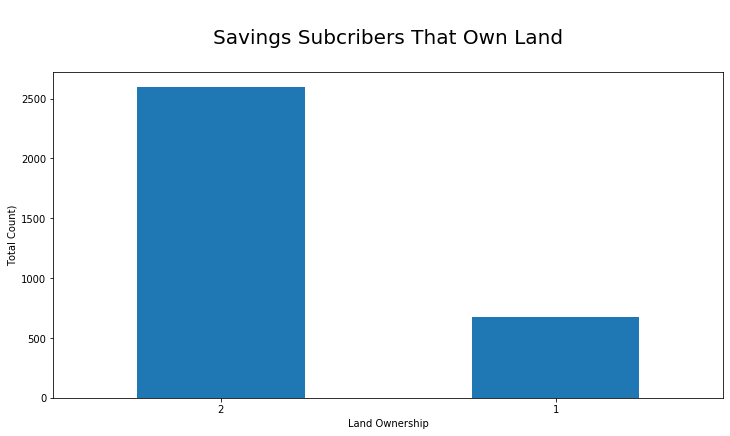

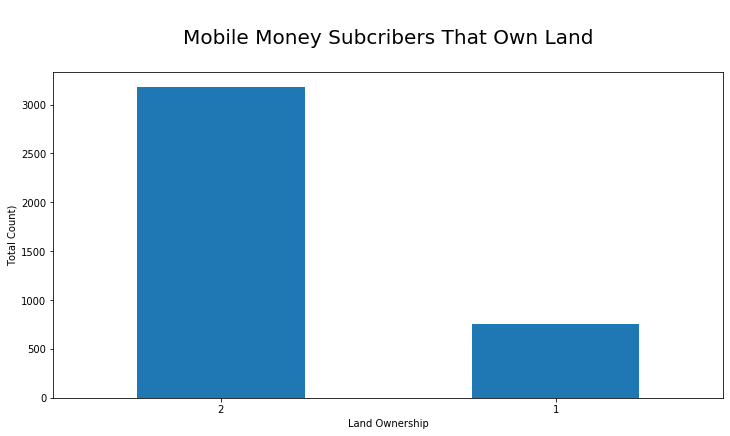

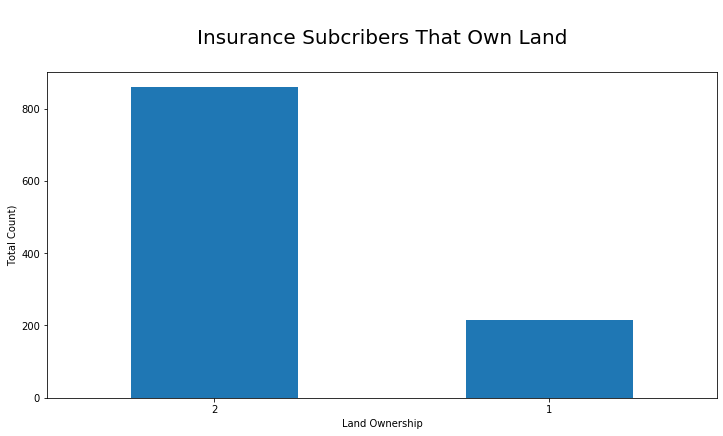

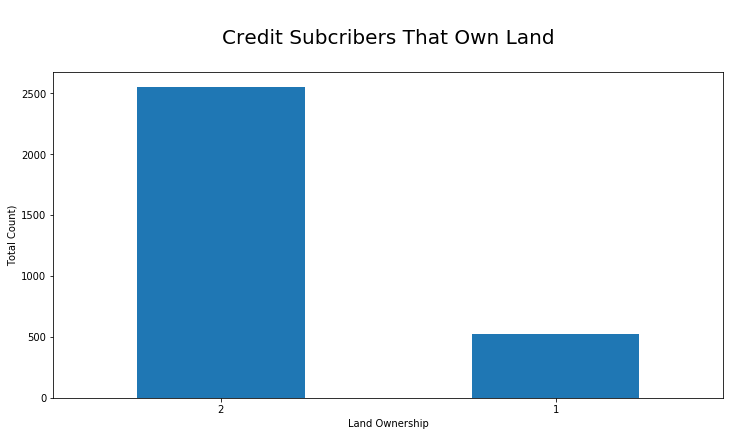

In [24]:
plt.subplots(figsize=(12, 6))
training[training.savings==1].groupby('Q6').savings.count().sort_values(ascending=False).plot(kind='bar')
plt.title('\nSavings Subcribers That Own Land\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('Land Ownership')
plt.xticks(rotation=0)
plt.show()

plt.subplots(figsize=(12, 6))
training[training.mobile_money==1].groupby('Q6').mobile_money.count().sort_values(ascending=False).plot(kind='bar')
plt.title('\nMobile Money Subcribers That Own Land\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('Land Ownership')
plt.xticks(rotation=0)
plt.show()

plt.subplots(figsize=(12, 6))
training[training.insurance==1].groupby('Q6').insurance.count().sort_values(ascending=False).plot(kind='bar')
plt.title('\nInsurance Subcribers That Own Land\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('Land Ownership')
plt.xticks(rotation=0)
plt.show()

plt.subplots(figsize=(12, 6))
training[training.borrowing==1].groupby('Q6').borrowing.count().sort_values(ascending=False).plot(kind='bar')
plt.title('\nCredit Subcribers That Own Land\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('Land Ownership')
plt.xticks(rotation=0)
plt.show()
# borrowing
# insurance

In [25]:
from geopy.geocoders import Nominatim
import folium

lat = -6.3728253 ; lon = 34.8924826
Country_map = folium.Map(location=[lat, lon], zoom_start=7)

In [26]:
for lat, long, label in zip(training['Latitude'],training['Longitude'],'Q8_1'):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'green',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map
